In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Preparation des donnees 

In [78]:
dataset = pd.read_csv("Advertising.csv");
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


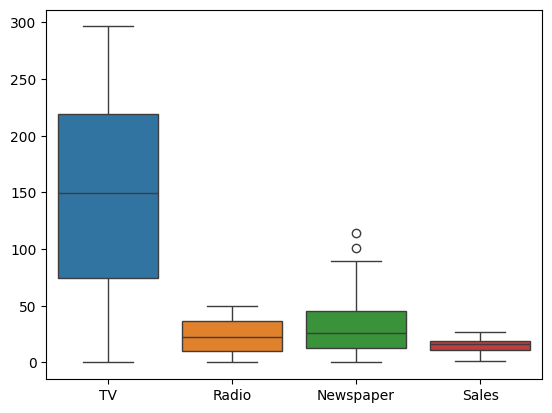

In [79]:
# Visualizing the difference between the range of values for each feature in the dataset
sns.boxplot(data=dataset)
plt.show()

# Travail 1 : Les formules mathématiques "from scratch"

In [80]:
# separation des données en features et target variable (X et y) 
# X contient les features et y contient la target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X[:10]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2]])

In [81]:
# separation des donnnees de test et d'entrainement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Normalisation des données avec la formule (X - X.mean()) / X.std()

X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

y_train = [[val] for val in y_train]
y_test = [[val] for val in y_test]

X_train[:10]

array([[ 0.62602631, -0.77516426, -0.57591833,  1.        ],
       [ 1.41524722, -0.75446339, -0.79198373,  1.        ],
       [-0.31715737, -0.52934136, -0.42066176,  1.        ],
       [-0.06874686, -0.71176783, -0.63802096,  1.        ],
       [ 2.02333547, -0.84373592, -0.67295369,  1.        ],
       [-0.38055381, -0.82691646, -0.69624217,  1.        ],
       [ 0.03863894, -0.66777847, -0.34691488,  1.        ],
       [ 1.03098721, -0.56556789, -0.62767052,  1.        ],
       [ 0.47853257, -0.80104036, -0.42971839,  1.        ],
       [ 0.11238581, -0.51899092, -0.66777847,  1.        ]])

In [82]:
def model(X, P):
    return np.dot(X, P)

def grad(X, y, P):
    m = len(y)
    return 1/m * X.T.dot(model(X, P) - y)

def cost_function(X, y, P):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, P) - y)**2)

def gradient_descent(X, y, P, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        P = P - learning_rate * grad(X, y, P)
        cost_history[i] = cost_function(X, y, P)

    return P, cost_history

def r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)

    total_sum_squares = np.sum((y_true - mean_y_true) ** 2)

    residual_sum_squares = np.sum((y_true - y_pred) ** 2)

    r_squared = 1 - (residual_sum_squares / total_sum_squares)

    return r_squared

def RSE(Y, PRE):
    u = np.sum((Y - PRE) ** 2)
    v = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - (u / v)

In [83]:
n_iterations = 100000
learning_rate = 0.00001
P_init = np.random.randn(4,1)

P, cost_history_1 = gradient_descent(X_train, y_train, P_init, learning_rate, n_iterations)

P

array([[ 5.01705084],
       [-3.23740024],
       [-1.70756949],
       [ 5.98833793]])

In [84]:
r_squared(y_test, model(X_test, P))

-15537.455716856002

# Mehode 2 : Utilisation de StandardScaler

In [85]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))

y_train = [[val] for val in y_train]
y_test = [[val] for val in y_test]

X_train[:10]

array([[-0.40424839, -1.02823707, -0.33767538,  1.        ],
       [ 0.32060772, -0.91982774, -1.16143931,  1.        ],
       [-1.27051084,  0.2591237 ,  0.25425079,  1.        ],
       [-1.04235941, -0.6962335 , -0.57444585,  1.        ],
       [ 0.8791034 , -1.38734296, -0.70762924,  1.        ],
       [-1.32873699, -1.29926038, -0.79641817,  1.        ],
       [-0.94373145, -0.46586368,  0.53541572,  1.        ],
       [-0.03231403,  0.06940738, -0.53498411,  1.        ],
       [-0.5397133 , -1.16374872,  0.21972176,  1.        ],
       [-0.875999  ,  0.31332837, -0.68789837,  1.        ]])

In [86]:
P_init = np.random.randn(4,1)

P, cost_history_2 = gradient_descent(X_train, y_train, P_init, learning_rate, n_iterations)

P

array([[ 2.05072409],
       [ 1.28893411],
       [-0.06379519],
       [10.21985749]])

In [87]:
r_squared(y_test, model(X_test, P))

0.06860091174682392

# Comparaison des resultats 

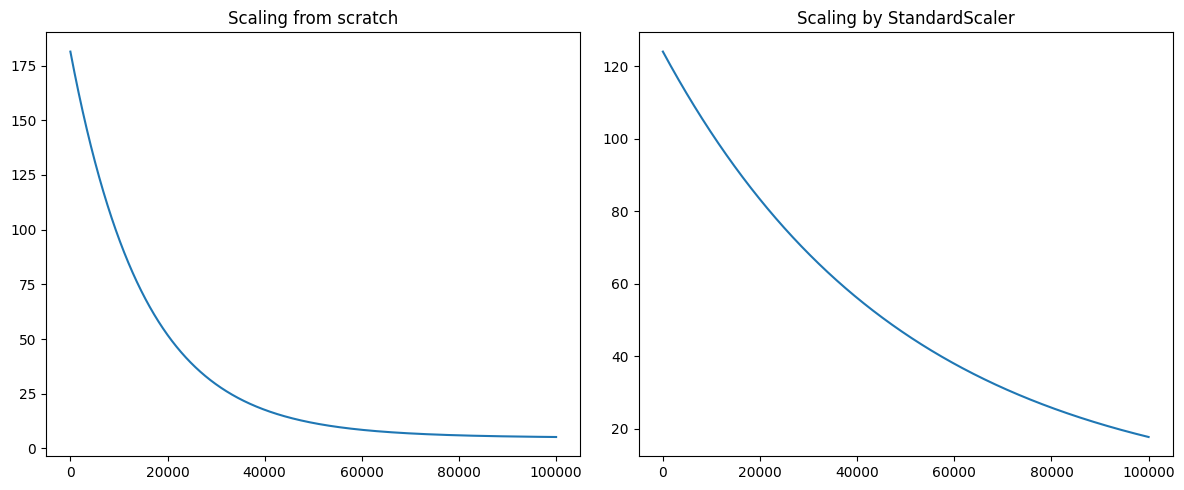

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# from scratch
axs[0].plot(range(n_iterations), cost_history_1)
axs[0].set_title('Scaling from scratch')
# using StandardScaler 
axs[1].plot(range(n_iterations), cost_history_2)
axs[1].set_title('Scaling by StandardScaler')
plt.tight_layout()
plt.show()